In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def radius(y,t,omega):
    R, V = y
    dydt = [V, R*(omega/4*((1+np.exp(-t))*R**2-6)/(R**2))**2-(omega**2/8)*(1+np.exp(-t))*R*(((1+np.exp(-t))*R**2-6)/(R**2))]
    return dydt

In [3]:
omega = 20
y0 = [1,0]
t = np.linspace(0,20,100)

In [4]:
sol = odeint(radius, y0, t, args=(omega,))
r = sol[:,0]

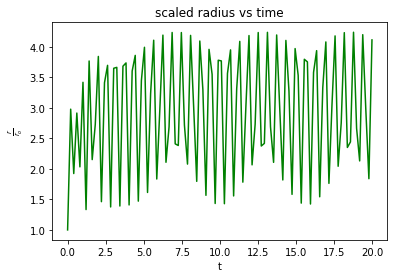

In [5]:
plt.plot(t, r , 'g')
plt.xlabel('t')
plt.ylabel(r'$\frac{r}{r_{o}}$')
plt.title('scaled radius vs time')
plt.savefig('/Users/surp/Desktop/Courses/Electrodynamics/rvst.jpg', dpi=300)
plt.show()

8.991000711596746


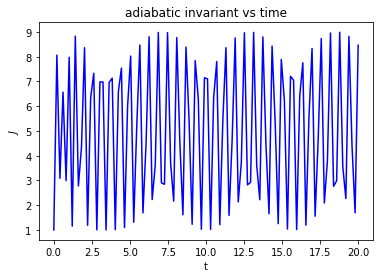

In [6]:
J = ((1+np.exp(-t))/2)*(r)**2
J_max = np.max(J)
print(J_max)
plt.plot(t, J ,'b')
plt.xlabel('t')
plt.ylabel(r'$J$')
plt.title('adiabatic invariant vs time')
plt.savefig('/Users/surp/Desktop/Courses/Electrodynamics/Jvst.jpg', dpi=300)
plt.show()

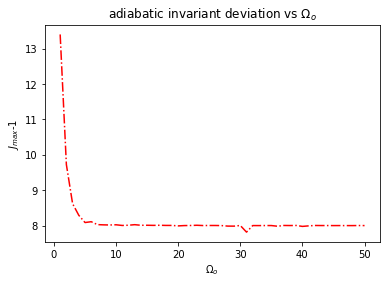

In [7]:
omega = np.linspace(1,50,50)
J_maxd=[]
for j in range(len(omega)):
    sol = odeint(radius, y0, t, args=(omega[j],))
    r = sol[:,0]
    J = ((1+np.exp(-t))/2)*(r)**2
    J_max = np.max(J)
    J_maxd.append(J_max-1)
plt.plot(omega, J_maxd , 'r-.')
plt.xlabel(r'$\Omega_{o}$')
plt.ylabel(r'$J_{max}$-1')
plt.title(r'adiabatic invariant deviation vs $\Omega_{o}$')
plt.savefig('/Users/surp/Desktop/Courses/Electrodynamics/jdvsomega.jpg', dpi=300)
plt.show()